In [4]:
##Welcome to my Facial Recognition Program. I took a data base of faces and then using the Single-Value Decomposition I 
## implemented an algorithm to find similar faces. This lab took a few steps, so if you scroll all the way to the 
## bottom of the page you will see the result of my program.


In [ ]:
%matplotlib inline


In [184]:
import numpy as np
from scipy import linalg as la
from os import walk
from scipy.ndimage import imread
from matplotlib import pyplot as plt
import matplotlib.cm as cm
from random import sample 
import random

def show(im, w=200, h=180):
    """Plot the flattened grayscale image 'im' of width 'w' and height 'h'."""
    plt.imshow(im.reshape((w,h)), cmap=cm.Greys_r)
    plt.show()
    
def show2(test_image, result, w=200, h=180):
    """Convenience function for plotting two flattened grayscale images of
    the specified width and height side by side
    """
    plt.subplot(121)
    plt.title("Inputed Image")
    plt.imshow(test_image.reshape((w,h)), cmap=cm.Greys_r)
    plt.axis("off")

    plt.subplot(122)
    plt.title("Closest Match")
    plt.imshow(result.reshape((w,h)), cmap=cm.Greys_r)
    plt.axis("off")
    plt.show()
    facialRec
def getFaces(path='./faces94'):
    """Traverse the directory specified by 'path' and return an array containing
    one column vector per subdirectory.def show2(test_image, result, w=200, h=180):
    images = np.array([imread(f).mean(axis=2).ravel() for f in test_files]).T
    return images

    """
    # Traverse the directory and get one image per subdirectory
    faces = []
    for (dirpath, dirnames, filenames) in walk(path):
        for f in filenames:
            if f[-3:]=="jpg": # only get jpg images
                # load image, convert to grayscale, flatten into vector
                face = imread(dirpath+"/"+f).mean(axis=2).ravel()
                faces.append(face)
                break
    # put all the face vectors column-wise into a matrix
    return np.array(faces).T

class FacialRec:
##########Members##########
# F, mu, Fbar, and U
###########################

    def __init__(self,path):
        self.initFaces(path)
        print np.shape(self.F)
        self.initMeanImage()
        self.initDifferences()
        self.initEigenfaces()
        
    def initFaces(self, path):
        self.F = getFaces(path)
        
    def initMeanImage(self):
        #print np.shape(self)
        self.mu = np.mean(self.F,axis=1)
        
    def initDifferences(self):
        
        self.Fbar = (self.F - np.vstack(self.mu))
    
    def initEigenfaces(self):
        self.U,s,Vt = la.svd(self.F,full_matrices = False)
        #print self.U
        
    def project(self, A, s=38):
        Us = self.U[:,:s]
        #print np.shape(A), np.shape(Us)
        return (Us.T).dot(A)
    
    def findNearest(self, image, s=38):
        #print np.shape(self.U)
        Us = self.U[:,s]
        #print np.shape(self.Fbar)
        fhat = self.project(self.Fbar,s)
        
        ghat = self.project(image - self.mu,s)
        
        norms = []
        
        #print len(fhat)
        #print np.shape(fhat)
        #print np.shape(fhat)
        for i in xrange(np.shape(fhat)[0]):
            #print la.norm(fhat[i] - ghat)
            norms.append(la.norm(fhat[:,i] - ghat))
            
        #print norms
        #print np.argmin(norms)
        return np.argmin(norms)
        
        
def sampleFaces(n_tests, path="./faces94"):
    """Return an array containing a sample of n_tests images contained
    in the path as flattened images in the columns of the output
    """
    files = []
    for (dirpath, dirnames, filenames) in walk(path):
        for f in filenames:
            if f[-3:]=="jpg": # only get jpg images
                files.append(dirpath+"/"+f)

    #Get a sample of the images
    test_files = random.sample(files, n_tests)
    #Flatten and average the pixel values
    images = np.array([imread(f).mean(axis=2).ravel() for f in test_files]).T
    return images
    

    



In [185]:
facialRec = FacialRec("./faces94")


(36000, 153)


###This is where I will determine the average face

In [23]:



facialRec.F
show(facialRec.mu)





In [103]:
f = getFaces()


##Showing a face that is a deviation from the average face, this is not the last problem


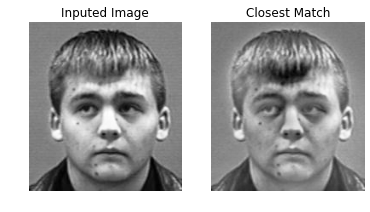

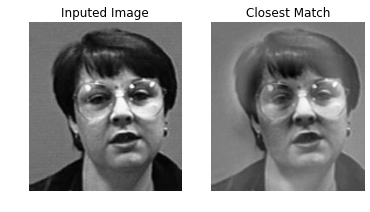

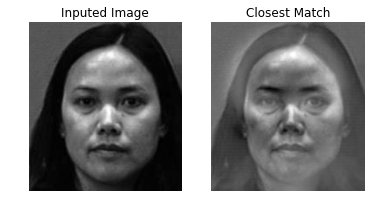

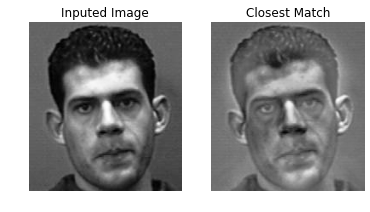

In [132]:

show2(f[:,53],f[:,53] - facialRec.mu)

show2(f[:,9],f[:,9] - facialRec.mu)

show2(f[:,13],f[:,13] - facialRec.mu) 

show2(f[:,62],f[:,62] - facialRec.mu)


###Problem #3

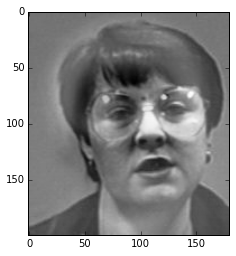

In [9]:
hello = facialRec.Fbar
show(hello[:,9])

###Problem 5 & 6

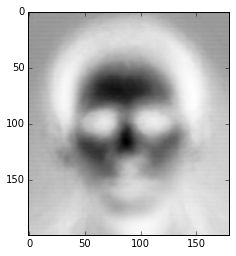

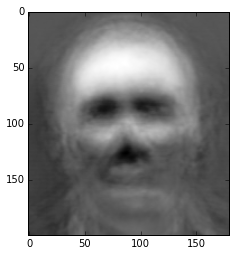

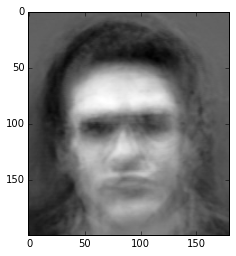

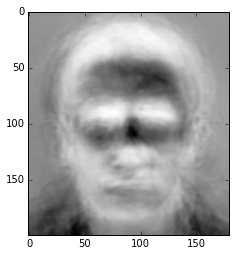

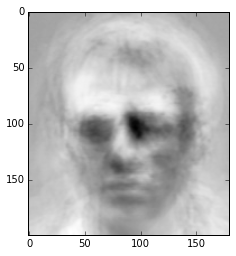

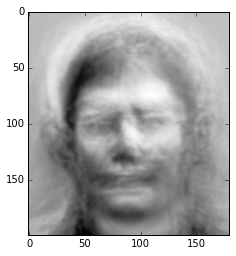

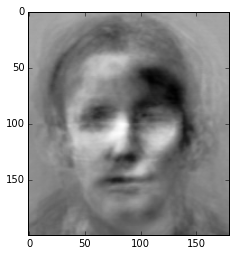

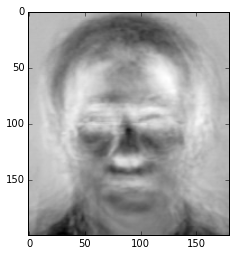

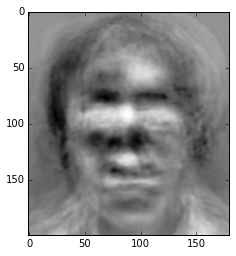

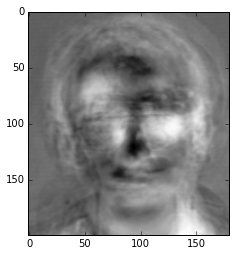

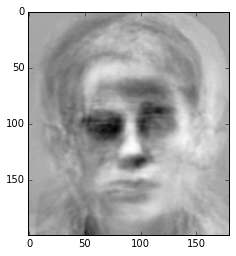

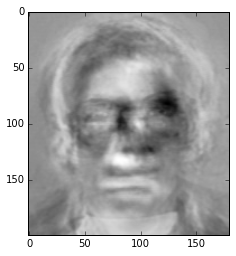

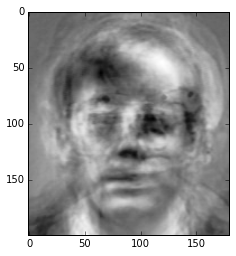

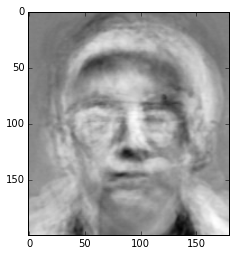

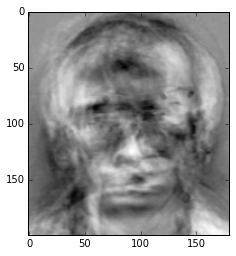

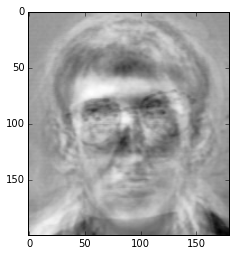

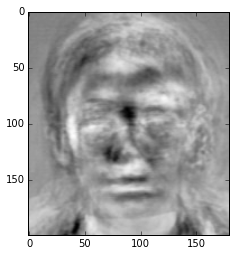

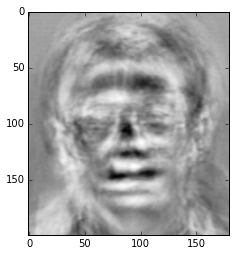

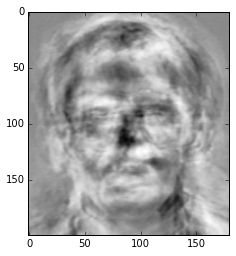

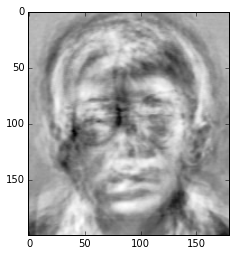

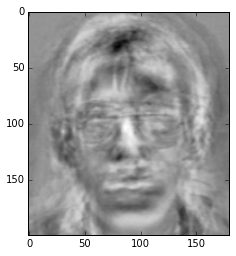

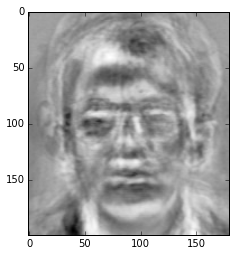

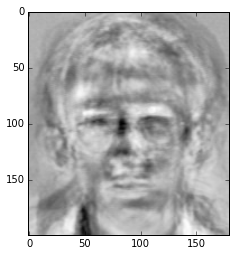

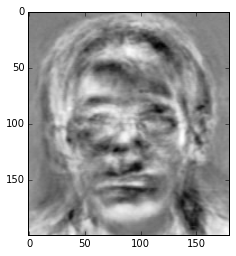

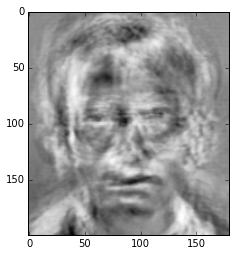

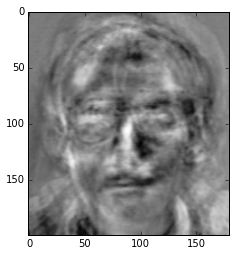

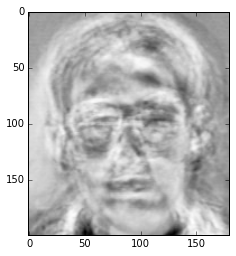

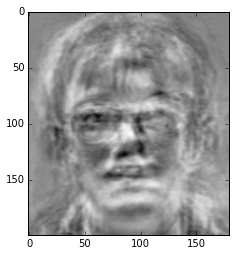

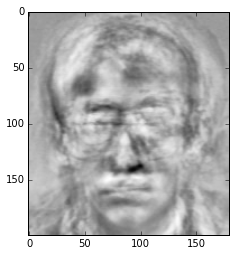

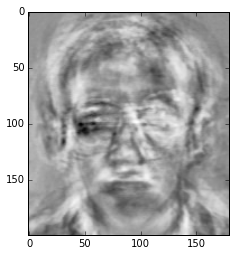

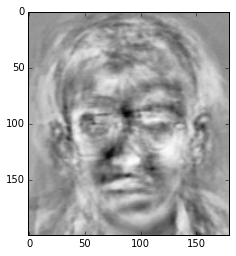

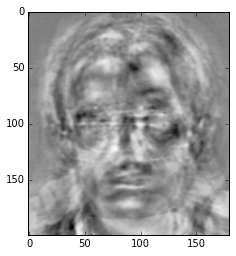

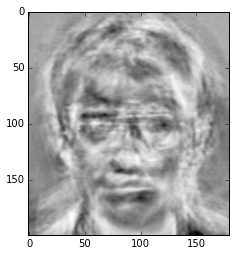

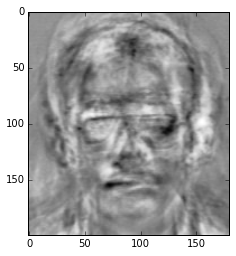

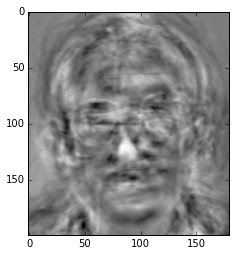

In [12]:
Goodbye = facialRec.U
show(Goodbye[:,0])
show(Goodbye[:,1])
show(Goodbye[:,2])
show(Goodbye[:,3])
show(Goodbye[:,4])
show(Goodbye[:,5])
show(Goodbye[:,6])
show(Goodbye[:,7])
show(Goodbye[:,8])
show(Goodbye[:,9])
show(Goodbye[:,10])
show(Goodbye[:,11])
show(Goodbye[:,12])
show(Goodbye[:,13])
show(Goodbye[:,14])
show(Goodbye[:,15])
show(Goodbye[:,16])
show(Goodbye[:,17])
show(Goodbye[:,18])
show(Goodbye[:,19])
show(Goodbye[:,20])
show(Goodbye[:,21])
show(Goodbye[:,22])
show(Goodbye[:,23])
show(Goodbye[:,24])
show(Goodbye[:,25])
show(Goodbye[:,26])
show(Goodbye[:,27])
show(Goodbye[:,28])
show(Goodbye[:,29])
show(Goodbye[:,30])
show(Goodbye[:,31])
show(Goodbye[:,32])
show(Goodbye[:,33])
show(Goodbye[:,34])
show(Goodbye[:,35])
show(Goodbye[:,36])
show(Goodbye[:,37])
show(Goodbye[:,38])
show(Goodbye[:,39])
show(Goodbye[:,40])
show(Goodbye[:,41])
show(Goodbye[:,42])
show(Goodbye[:,43])
show(Goodbye[:,44])
show(Goodbye[:,45])
show(Goodbye[:,46])
show(Goodbye[:,152])


In [189]:
test_images = sampleFaces(5)

In [107]:
test_images[:,4]

array([  99.        ,  101.        ,  103.        , ...,  146.33333333,
        148.        ,  148.66666667])

In [5]:
### Facial Recognition Program Results.

5 



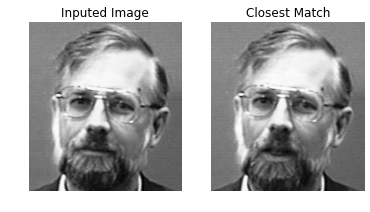

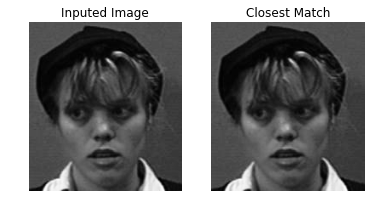

In [190]:
print np.shape(test_images)[1], "\n"
for i in xrange(np.shape(test_images)[1]):
    optimal_index = facialRec.findNearest(test_images[:,i],150)
    show2(test_images[:,i],f[:,optimal_index])
    